In [99]:
import zipfile,os
from PIL import Image
from random import shuffle
import numpy as np

In [ ]:
Zip=zipfile.ZipFile("/content/class_images.zip",mode='r')

In [ ]:
Zip.namelist()

['class_images/group/',
 'class_images/group/IMG_5879.JPG',
 'class_images/group/IMG_5880.JPG',
 'class_images/group/IMG_5881.JPG',
 'class_images/group/IMG_5882.JPG',
 'class_images/group/IMG_5883.JPG',
 'class_images/group/IMG_5884.JPG',
 'class_images/group/IMG_5886.JPG',
 'class_images/group/IMG_5887.JPG',
 'class_images/group/IMG_5888.JPG',
 'class_images/group/IMG_5889.JPG',
 'class_images/group/IMG_5890.JPG',
 'class_images/group/IMG_5891.JPG',
 'class_images/group/IMG_5892.JPG',
 'class_images/group/IMG_5893.JPG',
 'class_images/group/IMG_5894.JPG',
 'class_images/group/IMG_5895.JPG',
 'class_images/group/IMG_5896.JPG',
 'class_images/group/IMG_5897.JPG',
 'class_images/group/IMG_5898.JPG',
 'class_images/group/IMG_5899.JPG',
 'class_images/group/IMG_5900.JPG',
 'class_images/group/IMG_5901.JPG',
 'class_images/group/IMG_5902.JPG',
 'class_images/group/IMG_5903.JPG',
 'class_images/group/IMG_5904.JPG',
 'class_images/group/IMG_5905.JPG',
 'class_images/nonsmiling_cropped/',
 'c

In [ ]:
extrct=Zip.extractall('/content/')

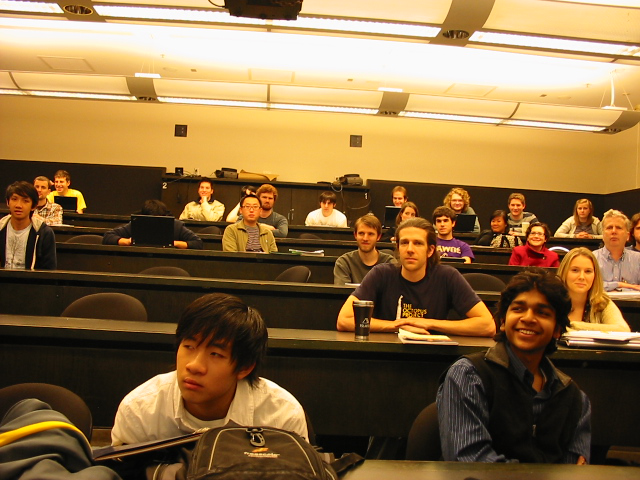

In [ ]:
img=Image.open('/content/'+Zip.namelist()[1])
img

In [ ]:
img.size

(640, 480)

In [ ]:
os.listdir()

['smiling_cropped', 'group', 'nonsmiling_cropped']

In [ ]:
Class_images_dir=os.getcwd() #/content/class_images  use os.chdir() to change or !cd

In [ ]:
labels=os.listdir(os.getcwd())

In [ ]:
for label in labels:
  shuffle(os.listdir(f'{Class_images_dir}/{label}/'))

In [84]:
train_group,train_nonsmiling,train_smile,cnt=[],[],[],0
for label in labels:
  cnt=0
  for pic_dir in os.listdir(f'{Class_images_dir}/{label}/'):
    # total 26 pics for group
    if label=='group':
      train_group.append(Class_images_dir + f'/{label}/' + pic_dir) 
      cnt+=1
    elif label=='nonsmiling_cropped':
      train_nonsmiling.append(Class_images_dir + f'/{label}/' + pic_dir)
      cnt+=1
    else:
      train_smile.append(Class_images_dir + f'/{label}/' + pic_dir)
      cnt+=1
  print(label,cnt)


smiling_cropped 36
group 26
nonsmiling_cropped 36


In [105]:
#total dataset size is 98
total_images=train_group+train_nonsmiling+train_smile
#test_images=train_group[20:]+train_nonsmiling[30:]+train_smile[30:]

In [106]:
shuffle(total_images) 

In [87]:
import cv2

In [107]:
cv2.imread(total_images[20])

array([[[  6,  24,  65],
        [  5,  24,  59],
        [  0,  16,  42],
        ...,
        [  2,  18,  47],
        [  6,  23,  50],
        [ 13,  30,  56]],

       [[  9,  29,  70],
        [  8,  28,  63],
        [  0,  20,  45],
        ...,
        [  5,  20,  52],
        [  3,  20,  47],
        [ 11,  28,  54]],

       [[  4,  31,  68],
        [  4,  29,  61],
        [  0,  23,  45],
        ...,
        [ 10,  26,  62],
        [  6,  24,  55],
        [ 13,  32,  59]],

       ...,

       [[ 92, 189, 239],
        [ 91, 188, 238],
        [ 91, 183, 234],
        ...,
        [ 87, 156, 206],
        [ 86, 169, 220],
        [ 89, 178, 229]],

       [[ 87, 186, 238],
        [ 88, 184, 237],
        [ 92, 184, 237],
        ...,
        [ 81, 159, 206],
        [ 82, 167, 217],
        [ 91, 180, 230]],

       [[ 89, 188, 240],
        [ 87, 183, 236],
        [ 96, 188, 241],
        ...,
        [ 55, 137, 184],
        [ 54, 142, 189],
        [ 80, 169, 219]]

In [94]:
def Preprocess_img(list_of_images):
  X,y=[],[]
  for image in list_of_images:
    X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR), (130,130), interpolation=cv2.INTER_CUBIC))  # reads the image and resizes it
    # now for labels
    if 'group' in image:
      y.append(0)
    elif 'nonsmiling' in image:
      y.append(1)
    else:
      y.append(2)
  return X,y

In [108]:
X,y = Preprocess_img(total_images)

In [109]:
X=np.array(X)
y=np.array(y)

In [114]:
print(X.shape, y.shape)

(98, 130, 130, 3) (98,)


In [116]:
X=np.reshape(X,(98,130*130*3))
X.shape

(98, 50700)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test, y_train, y_test= train_test_split(X,y, stratify=y, test_size=0.183) # 18 test samples 80 train samples
pca=PCA(0.95, whiten=True)   # interms of variance retained..
# trnasforming means Projecting the input data on the eigenfaces orthonormal basis
x_train_pca=pca.fit_transform(x_train,y_train)
x_test_pca=pca.transform(x_test)
print( y_train.shape,y_test.shape, x_train_pca.shape,x_test_pca.shape)
svc=SVC()
svc.fit(x_train_pca,y_train)
pred=svc.predict(x_test_pca)
print(f'Accuracy of the model is {accuracy_score(y_test,pred)*100}')
print(f'The classification report :-> {classification_report(y_test,pred)}')

(80,) (18,) (80, 29) (18, 29)
Accuracy of the model is 72.22222222222221
The classification report :->               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.57      0.67      0.62         6
           2       0.67      0.57      0.62         7

    accuracy                           0.72        18
   macro avg       0.75      0.75      0.74        18
weighted avg       0.73      0.72      0.72        18



In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train_pca,y_train)
pred= knn.predict(x_test_pca)
print(f'Accuracy of the model -> {accuracy_score(y_test, pred)*100}')
print(classification_report(y_test,pred))

Accuracy of the model -> 55.55555555555556
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.43      1.00      0.60         6
           2       1.00      0.57      0.73         7

    accuracy                           0.56        18
   macro avg       0.48      0.52      0.44        18
weighted avg       0.53      0.56      0.48        18



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# determine the number of input features
n_features = x_train_pca.shape[1]
# define model
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train_pca, y_train, epochs=100, batch_size=16, verbose=1)
# evaluate the model
loss, acc = model.evaluate(x_test_pca, y_test, verbose=1)
print('Test Accuracy: %.3f' % acc)


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2117 - accuracy: 0.3875
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1098 - accuracy: 0.4250
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0043 - accuracy: 0.4625
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9642 - accuracy: 0.5000
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.9295 - accuracy: 0.5500
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.5750
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8646 - accuracy: 0.6125
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.6125
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8094 - accuracy: 0.6500
Epoch 11/100
5/5 [===========